# Example of the `coronavirus-lifestyle-impacts` project

This notebook walks through an example using the `coronavirus_lifestyle_impacts` project. This package is designed to allow users to better understand the impacts of the 2019 Novel Coronavirus on people's lifestyles. This is done by using Google Trends data for certain keywords. This information is aggregated with Coronavirus data gathered from Bing. Running the command outputs a visualization of the requested data as well as an output `csv` file of the aggregated data for users to further explore if they are interested.

First, we will update our directory to go into the correct folder and properly run the package:

In [1]:
import os

os.chdir("../coronavirus_lifestyle_impacts/")

The project is run as a command line tool. The file to be run is `coronavirus_lifestyle_impacts.py`. We can run this using the `--help` command to read more about the arguments:

In [2]:
!python coronavirus_lifestyle_impacts.py --help

usage: coronavirus_lifestyle_impacts.py [-h] [-s STATE] [-k KEYWORDS]

Coronavirus Lifestyle Impacts CLI

optional arguments:
  -h, --help            show this help message and exit
  -s STATE, --state STATE
                        the US state to pull the data from. Can take either
                        full name and abbreviation. Default: "Washington"
  -k KEYWORDS, --keywords KEYWORDS
                        the comma delimited search keyword string. Default:
                        "Bars near me, Home workouts"


Aside from the `--help` flag, there are flags for `--state` and `--keywords` where users can input personalized parameters to get more specific data. This notebook walks through two examples:
1. Using the default parameters
2. Inputting custom parameters

## Default parameters

First, we will walk through the process of using the default parameters. As mentioned with the `--help` output, we can see the default state is 'Washington' and the default keywords are 'Bars near me' and 'Home workouts'. To use the defaults, one just needs to run the script without any flags:

In [3]:
!python coronavirus_lifestyle_impacts.py

Using input: state=Washington, keywords=['Bars near me', 'Home workouts']

=========Generating data========
            ID     Updated  Confirmed  ...  Country_Region  AdminRegion1  AdminRegion2
251918  127483  01/21/2020          1  ...   United States    Washington           NaN
251919  127484  01/24/2020          1  ...   United States    Washington           NaN
251920  127485  01/25/2020          1  ...   United States    Washington           NaN
251921  127486  01/26/2020          1  ...   United States    Washington           NaN
251922  127487  01/30/2020          1  ...   United States    Washington           NaN

[5 rows x 15 columns]
            Bars near me  Home workouts isPartial
date                                             
2019-06-09            83              9     False
2019-06-16            78              9     False
2019-06-23            80              9     False
2019-06-30            91              8     False
2019-07-07            80              9     Fal

As mentioned in the command prompt output, the project outputs a csv of all of the aggregated and cleaned data for further exploration if the user is interested. The resulting data contains the following columns:

| Column name | Description |
| ------------|-------------|
| Date | First day of the week for which the data represents |
| Confirmed | Number of confirmed Coronavirus cases for the week |
| ConfirmedChange | Change in confirmed Coronavirus cases from the previous week |
| Deaths | Number of Coronavirus deaths for the week |
| DeathsChange | Change in Coronavirus deaths from the previous week |
| Recovered| Number of Coronavirus recoveries for the week |
| RecoveredChange | Change in Coronavirus recoveries from the previous week |
| Country | Country for which the data represents |
| State | State for which the data represents |
| Keyword(s) | Google Trends relative search popularity for the given term(s) |

This is a preview of that output read in as a dataframe:

In [4]:
import pandas as pd
output_data = pd.read_csv("./outputs/Washington_agg_data_frame.csv")
output_data.head()

,Unnamed: 0,Date,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Country,State,Bars near me,Home workouts
0,0,2019-06-09,0.0,0.0,0.0,0.0,0.0,0.0,United States,Washington,83.0,9.0
1,1,2019-06-16,0.0,0.0,0.0,0.0,0.0,0.0,United States,Washington,78.0,9.0
2,2,2019-06-23,0.0,0.0,0.0,0.0,0.0,0.0,United States,Washington,80.0,9.0
3,3,2019-06-30,0.0,0.0,0.0,0.0,0.0,0.0,United States,Washington,91.0,8.0
4,4,2019-07-07,0.0,0.0,0.0,0.0,0.0,0.0,United States,Washington,80.0,9.0


As is also mentioned in the output, a visualization is saved in the `outputs/` folder. This visualization displays all requested trends and their relative search popularity on the y-axis and time on the x-axis. The requested trends are plotted in different colors and the count of coronavirus cases are denoted in gray x's that grow in size and deepen in color as the case count rises. Here is the visualization:

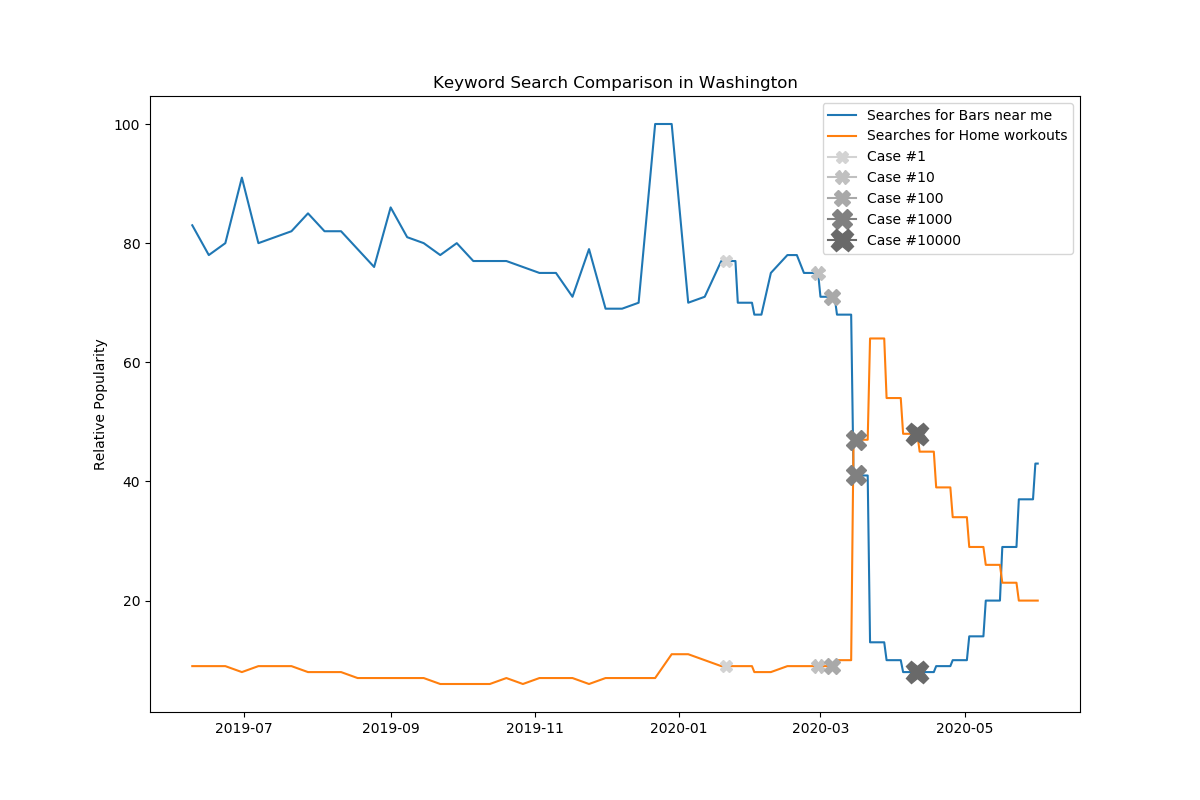

In [5]:
from IPython.display import Image
Image(filename="./outputs/Washington_coronavirus_trend_impacts.png") 

You can clearly see how the Coronavirus has impacted peoples interest in the bars near them as well as the desire to look into home workouts.

## Custom parameters

The project also allows custom parameters. In this case we will use the `--state` flag to gather information for the state of California and the `--keywords` flag to gather information on the relative search popularity for puppies vs kittens available for adoption:

In [6]:
!python coronavirus_lifestyle_impacts.py --state "California" --keywords "Puppies for adoption, Kittens for adoption"

Using input: state=California, keywords=['Puppies for adoption', 'Kittens for adoption']

=========Generating data========
            ID     Updated  Confirmed  ...  Country_Region  AdminRegion1  AdminRegion2
89685    19715  01/21/2020          0  ...   United States    California           NaN
89686    19716  01/24/2020          0  ...   United States    California           NaN
89687    19717  01/25/2020          1  ...   United States    California           NaN
89688  7150627  01/26/2020          2  ...   United States    California           NaN
89689    19719  01/30/2020          2  ...   United States    California           NaN

[5 rows x 15 columns]
            Puppies for adoption  Kittens for adoption isPartial
date                                                            
2019-06-09                    39                    15     False
2019-06-16                    40                    14     False
2019-06-23                    40                    16     False
2019-06

Again the resulting dataset is stored in the `outputs/` folder and we can preview the data:

In [7]:
output_data = pd.read_csv("./outputs/California_agg_data_frame.csv")
output_data.head()

,Unnamed: 0,Date,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Country,State,Puppies for adoption,Kittens for adoption
0,0,2019-06-09,0.0,0.0,0.0,0.0,0.0,0.0,United States,California,39.0,15.0
1,1,2019-06-16,0.0,0.0,0.0,0.0,0.0,0.0,United States,California,40.0,14.0
2,2,2019-06-23,0.0,0.0,0.0,0.0,0.0,0.0,United States,California,40.0,16.0
3,3,2019-06-30,0.0,0.0,0.0,0.0,0.0,0.0,United States,California,38.0,12.0
4,4,2019-07-07,0.0,0.0,0.0,0.0,0.0,0.0,United States,California,41.0,14.0


The visualization with the new search terms and state data is stored in the `outputs/` folder and can be seen here:

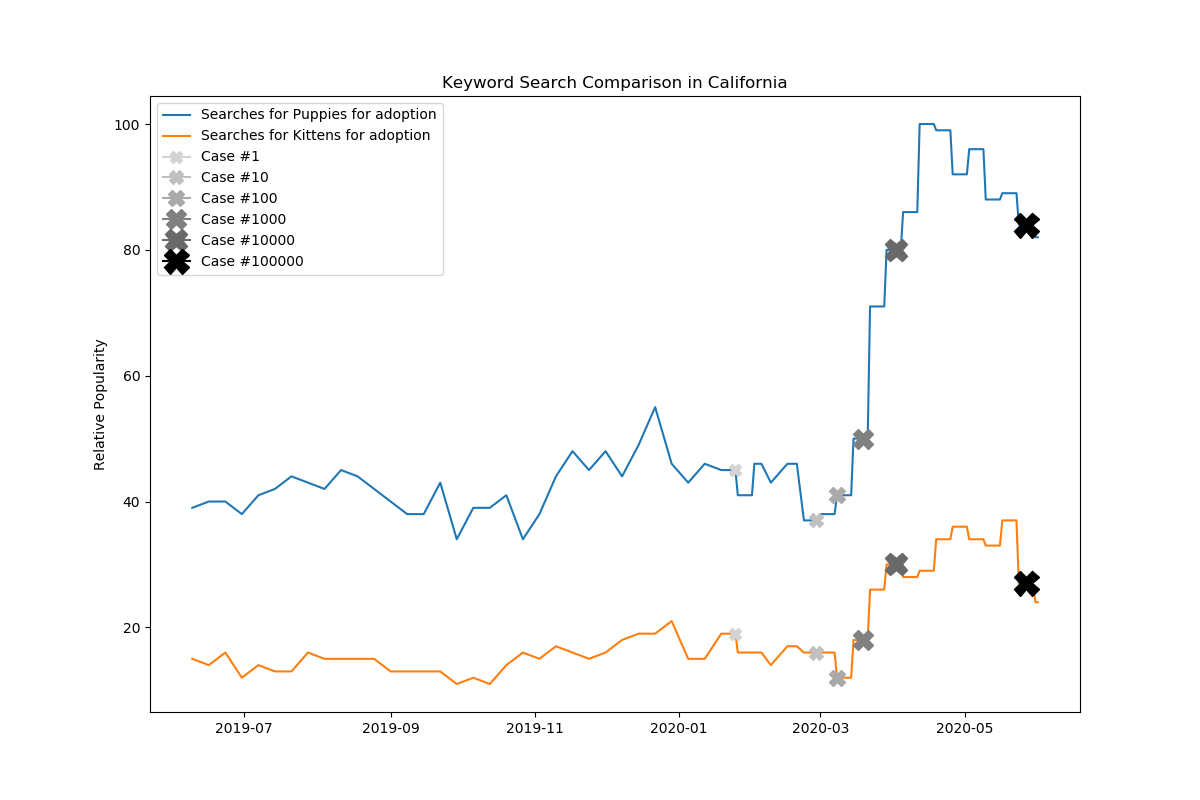

In [8]:
Image(filename="./outputs/California_coronavirus_trend_impacts.png") 

The package is highly customizable, and generates resulting datasets and visualizations for any combinations of state names and keywords.